In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
src = rasterio.open('../depth_dDEMs/hv/corrected/hv_depth_stack.tif')
a = src.read()
a.shape

(6, 15400, 3400)

In [3]:
src.meta

{'affine': Affine(1.0, 0.0, 421000.0,
       0.0, -1.0, 7678000.0),
 'count': 6,
 'crs': CRS({'init': 'epsg:32606'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 15400,
 'nodata': -9999.0,
 'transform': (421000.0, 1.0, 0.0, 7678000.0, 0.0, -1.0),
 'width': 3400}

In [4]:
a[a == src.nodata]=np.nan

In [5]:
a[a == 0]=np.nan

In [ ]:
plt.imshow(a[-3])
plt.colorbar()

In [6]:
mask = ~np.isnan(a).any(axis=0) * 1.0
mask[mask==0]=np.nan

#plt.figure(figsize=(6,16))
#plt.imshow(mask,vmin=0,vmax=1.1)
#plt.colorbar()

In [10]:
asum = np.nansum(a)

In [7]:
b = mask*a

In [11]:
bsum = np.nansum(b)

In [12]:
bsum / asum * 100

94.464644605071229

In [13]:
b.shape

(6, 15400, 3400)

In [23]:
b=b.astype('float32')

In [24]:
b.dtype

dtype('float32')

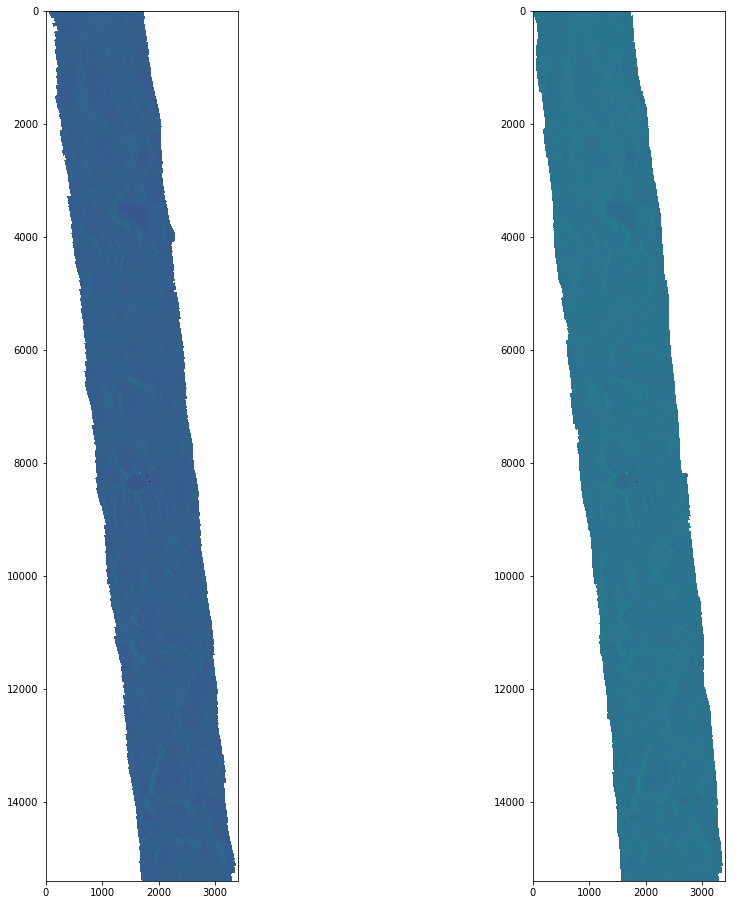

In [17]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(121)
ax1.imshow(b[-1])
ax2 = fig.add_subplot(122)
ax2.imshow(a[-1])

In [25]:
profile = src.profile
with rasterio.open('../depth_dDEMs/hv/corrected/hv_depth_stack_trimmed.tif', 'w', **profile) as dst:
        dst.write(b)

/home/cparr/apps/miniconda3/envs/data-scratchbook/lib/python3.5/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
